In [1]:
# Using the camera video data recorded in this lab, work with your team to create a
# shared Python code on GitHub that successfully identifies the following objects:
### At least one pedestrian
### At least one stop sign
### At least one vehicle
### Any other object

In [2]:
from IPython.display import Video
import numpy as np
import cv2
from matplotlib import pyplot as plt

(1, 3, 416, 416)
Inference time: 786.06 ms


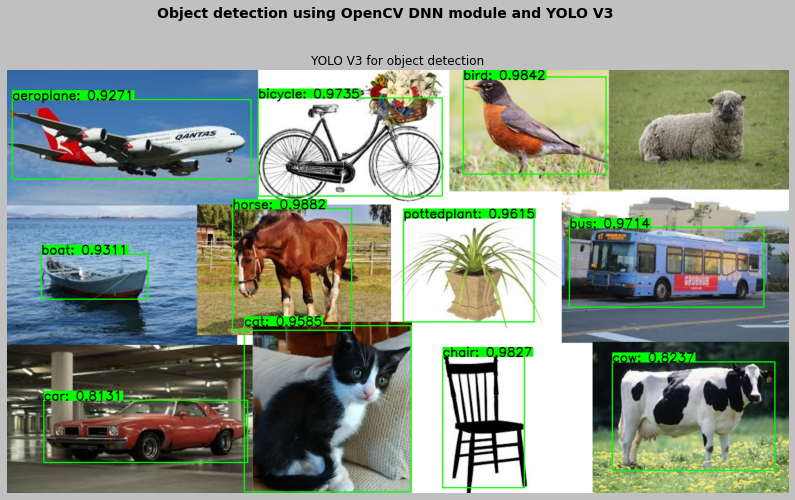

In [15]:
# Import required packages: Example Code
import cv2
import numpy as np
from matplotlib import pyplot as plt


def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')


# load the COCO class labels:
class_names = open("coco.names").read().strip().split("\n")

# Load the serialized caffe model from disk:
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

# Load input image:
image = cv2.imread("object_detection_test_image.png")
(H, W) = image.shape[:2]

# Get the output layer names:
layer_names = net.getLayerNames()
layer_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Create the blob with a size of (416, 416), swap red and blue channels
# and also a scale factor of 1/255 = 0,003921568627451:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
print(blob.shape)

# Feed the input blob to the network, perform inference and get the output:
net.setInput(blob)
layerOutputs = net.forward(layer_names)

# Get inference time:
t, _ = net.getPerfProfile()
print('Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency()))

# Initialization:
boxes = []
confidences = []
class_ids = []

# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # Get class ID and confidence of the current detection:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions:
        if confidence > 0.25:
            # Scale the bounding box coordinates (center, width, height) using the dimensions of the original image:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # Calculate the top-left corner of the bounding box:
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Update the information we have for each detection:
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# We can apply non-maxima suppression (eliminate weak and overlapping bounding boxes):
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

# Show the results (if any object is detected after non-maxima suppression):
if len(indices) > 0:
    for i in indices.flatten():
        # Extract the (previously recalculated) bounding box coordinates:
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        # Draw label and confidence:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        y = max(y, labelSize[1])
        cv2.rectangle(image, (x, y - labelSize[1]), (x + labelSize[0], y + 0), (0, 255, 0), cv2.FILLED)
        cv2.putText(image, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Create the dimensions of the figure and set title:
fig = plt.figure(figsize=(14, 8))
plt.suptitle("Object detection using OpenCV DNN module and YOLO V3", fontsize=14, fontweight='bold')
fig.patch.set_facecolor('silver')

# Show the output image
show_img_with_matplotlib(image, "YOLO V3 for object detection", 1)

# Show the Figure:
plt.show()


In [16]:
# load the COCO class labels:
class_names = open("coco.names").read().strip().split("\n")

# Load the serialized caffe model from disk:
net = cv2.dnn.readNetFromDarknet("yolov3.cfg", "yolov3.weights")

def show_img_with_matplotlib(color_img, title, pos):
    """Shows an image using matplotlib capabilities"""

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(1, 1, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis('off')

# Get the output layer names:
layer_names = net.getLayerNames()
layer_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Create the blob with a size of (416, 416), swap red and blue channels
# and also a scale factor of 1/255 = 0,003921568627451:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
print(blob.shape)

# Feed the input blob to the network, perform inference and get the output:
net.setInput(blob)
layerOutputs = net.forward(layer_names)

# Get inference time:
t, _ = net.getPerfProfile()
print('Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency()))

# Initialization:
boxes = []
confidences = []
class_ids = []

# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # Get class ID and confidence of the current detection:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions:
        if confidence > 0.25:
            # Scale the bounding box coordinates (center, width, height) using the dimensions of the original image:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")

            # Calculate the top-left corner of the bounding box:
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            # Update the information we have for each detection:
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# We can apply non-maxima suppression (eliminate weak and overlapping bounding boxes):
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

# Show the results (if any object is detected after non-maxima suppression):
if len(indices) > 0:
    for i in indices.flatten():
        # Extract the (previously recalculated) bounding box coordinates:
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])

        # Draw label and confidence:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
        labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        y = max(y, labelSize[1])
        cv2.rectangle(image, (x, y - labelSize[1]), (x + labelSize[0], y + 0), (0, 255, 0), cv2.FILLED)
        cv2.putText(image, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
    
def process(image):
    (H, W) = image.shape[:2]

    # Get the output layer names:
    layer_names = net.getLayerNames()
    layer_names = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    # Create the blob with a size of (416, 416), swap red and blue channels
    # and also a scale factor of 1/255 = 0,003921568627451:
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    print(blob.shape)

    # Feed the input blob to the network, perform inference and get the output:
    net.setInput(blob)
    layerOutputs = net.forward(layer_names)

    # Get inference time:
    t, _ = net.getPerfProfile()
    print('Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency()))

    # Initialization:
    boxes = []
    confidences = []
    class_ids = []

    # loop over each of the layer outputs
    for output in layerOutputs:
        # loop over each of the detections
        for detection in output:
            # Get class ID and confidence of the current detection:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filter out weak predictions:
            if confidence > 0.25:
                # Scale the bounding box coordinates (center, width, height) using the dimensions of the original image:
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")

                # Calculate the top-left corner of the bounding box:
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))

                # Update the information we have for each detection:
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # We can apply non-maxima suppression (eliminate weak and overlapping bounding boxes):
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.3)

    # Show the results (if any object is detected after non-maxima suppression):
    if len(indices) > 0:
        for i in indices.flatten():
            # Extract the (previously recalculated) bounding box coordinates:
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])

            # Draw label and confidence:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            label = "{}: {:.4f}".format(class_names[class_ids[i]], confidences[i])
            labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            y = max(y, labelSize[1])
            cv2.rectangle(image, (x, y - labelSize[1]), (x + labelSize[0], y + 0), (0, 255, 0), cv2.FILLED)
            cv2.putText(image, label, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    return image

(1, 3, 416, 416)
Inference time: 1193.17 ms


In [17]:
Video("Lab3Video1_Trim.mp4")

In [18]:
cap = cv2.VideoCapture('Lab3Video1_Trim.mp4')

writer = cv2.VideoWriter('StopSign.avi', cv2.VideoWriter_fourcc(*'MJPG'), 20, (int(width/2),height))

In [19]:
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = process(frame)
    
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cap.release()

cv2.destroyAllWindows()

(1, 3, 416, 416)
Inference time: 888.88 ms
(1, 3, 416, 416)
Inference time: 956.73 ms
(1, 3, 416, 416)
Inference time: 929.75 ms
(1, 3, 416, 416)
Inference time: 1100.98 ms
(1, 3, 416, 416)
Inference time: 1193.34 ms
(1, 3, 416, 416)
Inference time: 1016.44 ms
(1, 3, 416, 416)
Inference time: 820.09 ms


In [ ]:
Video('Lab3Video2_Trim.mp4')

In [ ]:
caps = cv2.VideoCapture('Lab3Video2_Trim.mp4')

writer = cv2.VideoWriter('BillyWalking.avi', cv2.VideoWriter_fourcc(*'MJPG'), 20, (int(width/2),height))

In [ ]:
while(caps.isOpened()):
    ret, frame = caps.read()
    frame = process(frame)
    
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cap.release()

cv2.destroyAllWindows()

In [ ]:
Video('Lab3Video3_Trim.mp4')

In [ ]:
capz = cv2.VideoCapture('Lab3Video3_Trim.mp4')

writer = cv2.VideoWriter('Cars_and_Parking_Garage.avi', cv2.VideoWriter_fourcc(*'MJPG'), 20, (int(width/2),height))

In [ ]:
while(capz.isOpened()):
    ret, frame = capz.read()
    frame = process(frame)
    
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cap.release()

cv2.destroyAllWindows()

In [ ]:
Video('Lab3Video4_Trim.mp4')

In [ ]:
capx = cv2.VideoCapture('Lab3Video4_Trim.mp4')

writer = cv2.VideoWriter('Top_Of_Ramp.avi', cv2.VideoWriter_fourcc(*'MJPG'), 20, (int(width/2),height))

In [ ]:
while(capx.isOpened()):
    ret, frame = capx.read()
    frame = process(frame)
    
    writer.write(frame)
    cv2.imshow('frame', frame)
    
    
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
        
cap.release()

cv2.destroyAllWindows()